In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

ModuleNotFoundError: No module named 'pandas_datareader'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

ModuleNotFoundError: No module named 'pandas_datareader'

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [4]:
start="2010-01-01"
end="2021-08-29"
df= data.DataReader("AAPL","Yahoo",start, end)
df.head()

NotImplementedError: data_source='Yahoo' is not implemented

In [5]:
start="2010-01-01"
end="2019-12-31"
df= data.DataReader("AAPL","Yahoo",start, end)
df.head()

NotImplementedError: data_source='Yahoo' is not implemented

In [7]:
start="2010-01-01"
end="2021-12-31"
df= data.DataReader("AAPL","yahoo",start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.425999
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.526021
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.537305
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.433320
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.421424


In [8]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-12-27,180.419998,177.070007,177.089996,180.330002,74919600.0,179.586868
2021-12-28,181.330002,178.529999,180.160004,179.289993,79144300.0,178.551147
2021-12-29,180.630005,178.139999,179.330002,179.380005,62348900.0,178.640778
2021-12-30,180.570007,178.089996,179.470001,178.199997,59773000.0,177.465622
2021-12-31,179.229996,177.259995,178.089996,177.570007,64062300.0,176.838242


In [9]:
df = df.reset.index()
df.head()

AttributeError: 'DataFrame' object has no attribute 'reset'

In [10]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.425999
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.526021
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.537305
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.433320
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.421424


In [11]:
df=df.drop(["Date","Adj Close"],axis=1)
df.head()

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0


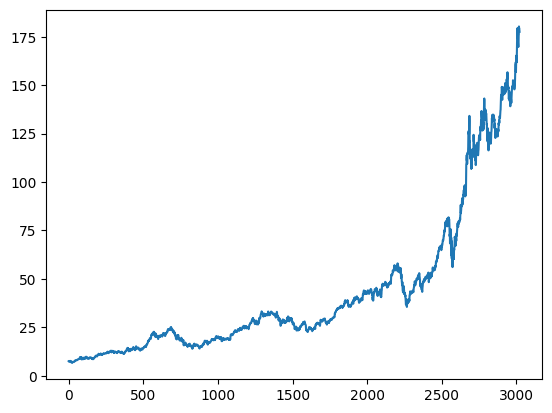

In [12]:
plt.plot(df.Close)

In [14]:
m=df.Close.rolling(50).mean()
m

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3017    159.597001
3018    160.286001
3019    160.942601
3020    161.531401
3021    162.097601
Name: Close, Length: 3022, dtype: float64

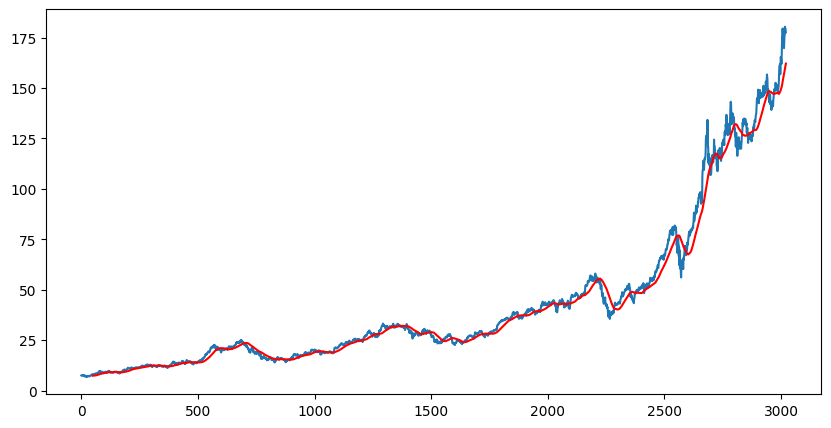

In [16]:
plt.figure(figsize=(10,5))
plt.plot(df.Close)
plt.plot(m,"r")

In [17]:
m1=df.Close.rolling(150).mean()
m1

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3017    147.899533
3018    148.248800
3019    148.599000
3020    148.951800
3021    149.304867
Name: Close, Length: 3022, dtype: float64

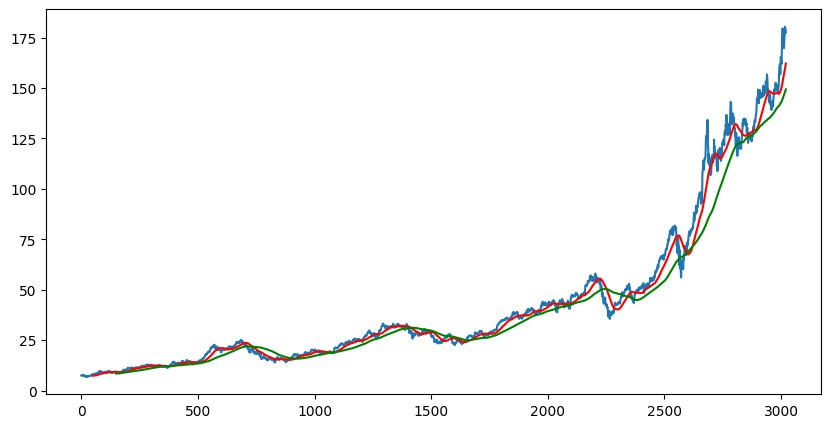

In [18]:
plt.figure(figsize=(10,5))
plt.plot(df.Close)
plt.plot(m,"r")
plt.plot(m1,"g")

In [19]:
dtrain=pd.DataFrame(df["Close"][0:int(len(df)*0.50)])
dtest=pd.DataFrame(df["Close"][int(len(df)*0.50):int(len(df))])


In [20]:
dtrain.head()

,Close
0,7.526071
1,7.643214
2,7.656429
3,7.534643
4,7.520714


In [21]:
dtest.head()

,Close
1511,26.337500
1512,25.677500
1513,25.174999
1514,24.112499
1515,24.240000


In [24]:
from sklearn.preprocessing import MinMaxScaler
s=MinMaxScaler(feature_range=(0,1))

In [29]:
d_train_array=s.fit_transform(dtrain)
d_train_array

array([[0.02527908],
       [0.02971782],
       [0.03021854],
       ...,
       [0.7701874 ],
       [0.7567359 ],
       [0.73722175]])

In [36]:
x_train=[]
y_train=[]
for i in range(100,d_train_array.shape[0]):
    x_train.append(d_train_array[i-100:i])
    y_train.append(d_train_array[i,0])
x_train,y_train=np.array(x_train),np.array(y_train)

In [39]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

model=Sequential()
model.add(LSTM(units=100,activation="relu",return=True,input_shape=(x_train.shape[1],1)))

In [42]:
model=Sequential()
model.add(LSTM(units=50,activation="relu",return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation="relu",return_sequences=True,))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation="relu",return_sequences=True,))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(units=1))


In [43]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_3 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_4 (LSTM)               (None, 120)              

In [44]:
model.compile(optimizer="adam",loss="mean_squared_error")
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
45/45 [==============================] - 15s 214ms/step - loss: 0.0730
Epoch 2/50
45/45 [==============================] - 18s 408ms/step - loss: 0.0142
Epoch 3/50
45/45 [==============================] - 20s 439ms/step - loss: 0.0106
Epoch 4/50
45/45 [==============================] - 13s 290ms/step - loss: 0.0107
Epoch 5/50
45/45 [==============================] - 17s 377ms/step - loss: 0.0091
Epoch 6/50
45/45 [==============================] - 13s 283ms/step - loss: 0.0081
Epoch 7/50
45/45 [==============================] - 12s 278ms/step - loss: 0.0069
Epoch 8/50
45/45 [==============================] - 11s 250ms/step - loss: 0.0078
Epoch 9/50
45/45 [==============================] - 11s 243ms/step - loss: 0.0076
Epoch 10/50
45/45 [==============================] - 11s 235ms/step - loss: 0.0067
Epoch 11/50
45/45 [==============================] - 11s 238ms/step - loss: 0.0067
Epoch 12/50
45/45 [==============================] - 10s 232ms/step - loss: 0.0070
Epoch 13/50
4

In [45]:
model.save("Keras_Mod1")

INFO:tensorflow:Assets written to: Keras_Mod1\assets


In [46]:
dtest.head()

,Close
1511,26.337500
1512,25.677500
1513,25.174999
1514,24.112499
1515,24.240000


In [48]:
dtest.tail(100)

,Close
2922,145.860001
2923,148.889999
2924,149.100006
2925,151.119995
2926,150.190002
...,...
3017,180.330002
3018,179.289993
3019,179.380005
3020,178.199997


In [49]:
phundred_days=dtrain.tail(100)

In [50]:
final_df=phundred_days.append(dtest,ignore_index=True)

C:\Users\Paavan\AppData\Local\Temp\ipykernel_11888\1982517294.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=phundred_days.append(dtest,ignore_index=True)


In [51]:
final_df.head()

,Close
0,28.372499
1,28.809999
2,28.787500
3,28.990000
4,29.290001


In [52]:
final_df.tail()

,Close
1606,180.330002
1607,179.289993
1608,179.380005
1609,178.199997
1610,177.570007


In [57]:
input_data=s.fit_transform(final_df)
input_data

array([[0.03668896],
       [0.03946243],
       [0.0393198 ],
       ...,
       [0.99397764],
       [0.98649716],
       [0.98250344]])

In [59]:
input_data.shape

(1611, 1)

In [61]:
x_test=[]
y_test=[]
for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [62]:
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1511, 100, 1)
(1511,)


In [63]:
y_pre=model.predict(x_test)

48/48 [==============================] - 6s 78ms/step


In [64]:
y_pre.shape

(1511, 1)

In [65]:
y_test

array([0.0237884 , 0.01960443, 0.0164189 , ..., 0.99397764, 0.98649716,
       0.98250344])

In [66]:
y_pre

array([[0.14016475],
       [0.13985834],
       [0.13957536],
       ...,
       [0.9334635 ],
       [0.9349155 ],
       [0.93706757]], dtype=float32)

In [67]:
s.scale_

array([0.00633935])

In [68]:
s_factor=1/0.00633935
y_pre=y_pre*s_factor
y_test=y_test*s_factor

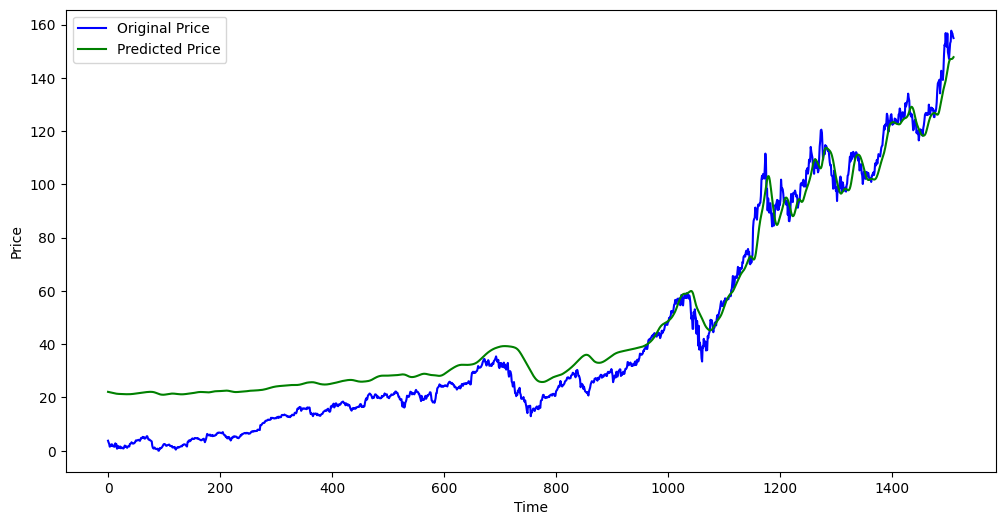

In [69]:
plt.figure(figsize=(12,6))
plt.plot(y_test,"b",label="Original Price")
plt.plot(y_pre,"g",label="Predicted Price")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()